BioComp Project:Developing a Social Distancing Practice within a Community

    We started this project with the goal to work a social distancing method (e.g., "lock down") on an infected population.This simulation would show 90% of our population stop moving after a certain number of runs and the remaining 10% would move with a significantly reduced speed. We also considered testing the size of the population to a potential difference in results before cutting the idea to focus on speed of infection. To accomplish this goal, we decided to use the deer diffusion model/deer cabbage procreate model. Since we wanted to show how much "slower" the spread of coronavirus would be when most of our population isn't moving, or at a reduced speed, we started off with one infected dot within its community. Within the model, we set all parameters but one is set at sensible values. We developed our enclosure to be square, with "closed" borders (with walls and corners) instead of toroidal borders, and the arena size of 4.


In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Define constants

class Const: # Carefree remote-eating cheaters
    def __init__(self):
        self.n_animals_max = 300
        self.n_animals_start = 300 # Original n_animals
        self.n_steps = 1000
        self.n_steps_quarentine = 200
        self.vmin = 0.01
        self.qmin = 0.001
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 4
        self.hp_baby = 20
        self.hp_reproduction = 35
        self.hp_birthcost = 30        
        self.hp_leak = 0.5
        self.contagion_distance = 0.01**1  
        #self.speed= 0.6

In [3]:
# Build the control model (no social distancing method implemented)

def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, c.n_steps_quarentine, n_trials))

    for i_trial in range(n_trials):
        # Allocate hp for all animals, but only first few are alive
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        
        x = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        infected = np.zeros(c.n_animals_max)
        infected[0] = 1 #Patient zero 
    
    
        n_animals = np.zeros(c.n_steps)

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(4,4))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            # Make them run around (keeps speed somewhat randomized)
            
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals_max):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
            
            potential_babies = np.argwhere(hp<=0)
            baby_counter = 0
            for i_animal in np.argwhere(hp>0): # <---- This gains about a second of performance                    
        
                
           
                n_animals[t] = np.sum(hp>0)
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=4);
                plt.plot(x[infected==0],y[infected==0],'k.', markersize=4)
                plt.plot(x[infected==1],y[infected==1],'r.', markersize=4)
                plt.xlim((0,c.arena_size))
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
            else:
                ifprint('.',end='')
        # --- Time loop is over

        #history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


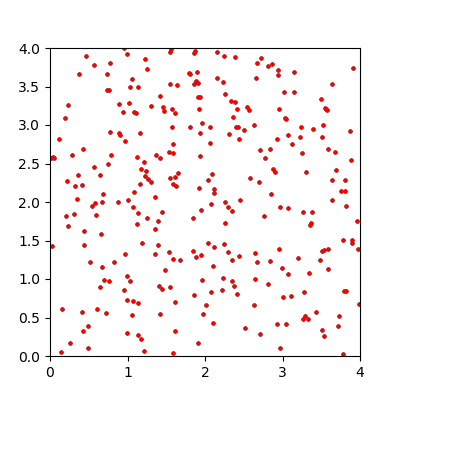

Wall time: 1min


In [4]:
c = Const()
np.random.seed(1)
%time curve = model(c, show_dotses=True);

In [6]:
# Build the experimental model (social distancing method (e.g., "lock down") implemented)

def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, c.n_steps_quarentine, n_trials))

    for i_trial in range(n_trials):
        # Allocate hp for all animals, but only first few are alive
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(size=c.n_animals_start)
        
        x = np.random.uniform(low=0, high=c.arena_size,size=c.n_animals_max)
        y = np.random.uniform(low=0, high=c.arena_size,size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        infected = np.zeros(c.n_animals_max)
        infected[0] = 1 #Patient zero 
    
    
        n_animals = np.zeros(c.n_steps)

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots; just creating axes
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
            
            if (t) > 150:
                c.vmin = 0.001
            # Make them run around (keeps speed somewhat randomized)
            
            #reduce speed of deer after 150 steps
            #if (c.n_steps) > 150:
            #    x += vx
             #   y += vy
                
            #    vx = np.random.randn(c.n_animals_max)*0.001
            #    vy = np.random.randn(c.n_animals_max)*0.001
           
            #if infected[victims]>50:    -----# This didnt work within the same loop or in diff one= Good try tho!
                #self.speed= 0
                
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size, x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size, y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x, c.arena_size)) # Keep them in enclosure
            y = np.maximum(0,np.minimum(y, c.arena_size))
            
            for i_animal in range(c.n_animals_max):
                if infected[i_animal]==1:
                    d = np.square(x-x[i_animal]) + np.square(y-y[i_animal])
                    victims = np.argwhere(d < c.contagion_distance)
                    infected[victims] = 1
            
            potential_babies = np.argwhere(hp<=0)
            baby_counter = 0
            for i_animal in np.argwhere(hp>0): # <---- This gains about a second of performance                    
        

           
                n_animals[t] = np.sum(hp>0)
                
            #stats[t] = np.sum(infected)/c.n_animals
            
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=4);
                plt.plot(x[infected==0],y[infected==0],'k.', markersize=5)
                plt.plot(x[infected==1],y[infected==1],'r.', markersize=5)
                plt.xlim((0,c.arena_size))
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)

            else:
                if t % 100 == 0:
                    print('.',end='')
        # --- Time loop is over

        #history[:,i_trial] = stats
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


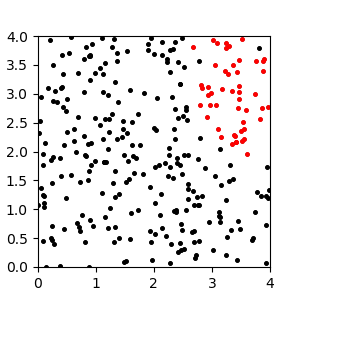

In [7]:
c = Const()
np.random.seed(1)
curve = model(c, show_dotses=True) #, n_trials=1);
#plt.figure(figsize=(3,3))
#plt.plot(np.diff(curve))

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

<IPython.core.display.Javascript object>


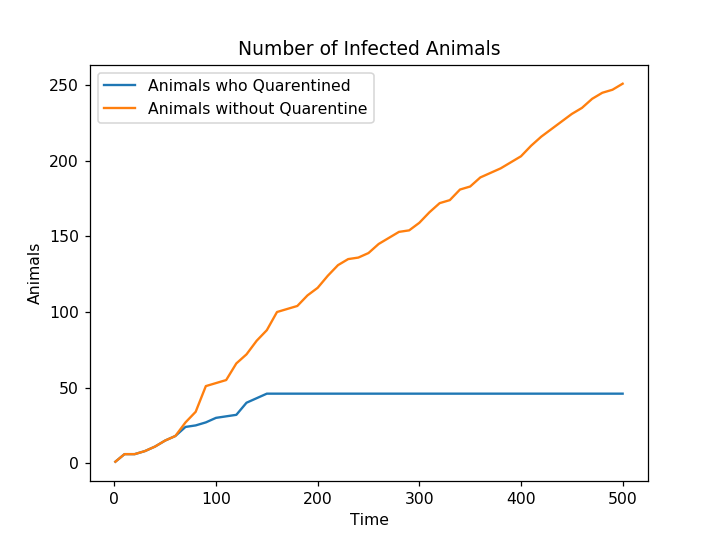

In [11]:
import matplotlib.pyplot as plt
# line 1 points
y1 = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500]
x1 = [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500]
# line 2 points
y2 = [1,6,6,8,11,15,18,24,25,27,30,31,32,40,43,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46]
x2 = [1,6,6,8,11,15,18,27,34,51,53,55,66,72,81,88,100,102,104,111,116,124,131,135,136,139,145,149,153,154,159,166,172,174,181,183,189,192,195,199,203,210,216,221,226,231,235,241,245,247,251]
# plotting the line 1 points 
plt.plot(x1, y2, label = "Animals who Quarentined")
# plotting the line 2 points 
plt.plot(y1, x2, label = "Animals without Quarentine")
plt.xlabel('Time')
# Set the y axis label of the current axis.
plt.ylabel('Animals')
# Set a title of the current axes.
plt.title('Number of Infected Animals')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

     We ultimately could not figure out how to separate the population until two groups. Because of this, we focused on stopping the motion of the dots within their population. Since we wanted to show how much "slower" (i.e., no speed). We started off with one infected dot within its community. Within the model, we set all parameters but one is set at sensible values. To influence the speed, we changed the value of two of our parameters. We added a conditional statement inside the loop that changed the vmin value of 0.01 to 0.005 and the v_decay value of 0.7 to a 0.001 after a set number of runs. It worked! We also tried to add another statement to stop all motion of individuals after a set number of them were infected, which did not achieve as successful results as our other attempts. In the end, the rate of infection was reduced. Visually, all dots in the control group population were infected. In comparison, the experimental group had less than 1/4 of their population infected by the end of the simulation. 